# Laboratorio 04: Regresión Lineal Multivariada 

## Dayana Andrea Henao Arbeláez 


In [725]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.


In [726]:
# Número de muestras (puntos de datos)
N = 100

# Generación de las dos variables independientes x₁ y x₂ en el rango [-1, 1]
x_1=2*np.random.random(N)-1
x_2=2*np.random.random(N)-1

# Cálculo de la variable dependiente (etiqueta)
y_label=2.1*x_1-3.1*x_2

df=pd.DataFrame({"x1":x_1, "x2":x_2, "y":y_label})

df


,x1,x2,y
0,0.753247,0.802695,-0.906537
1,-0.598979,-0.264636,-0.437483
2,-0.390508,0.153602,-1.296232
3,-0.854704,-0.089188,-1.518395
4,-0.232937,-0.215853,0.179975
...,...,...,...
95,-0.307837,-0.677490,1.453761
96,-0.826186,-0.322076,-0.736554
97,-0.396528,0.581880,-2.636537
98,-0.670119,0.947474,-4.344419


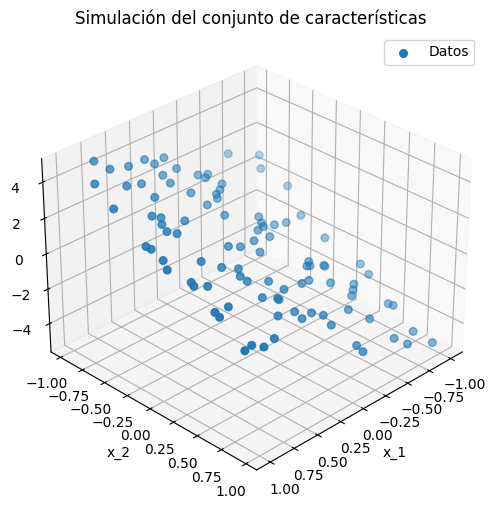

In [727]:
# Gráfico de los datos simulados
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x1'], df['x2'], df['y'], s=30, label='Datos')
ax.view_init(elev= 10, azim=45)
ax.set_box_aspect(aspect=None, zoom=1)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y_label')
ax.set_title('Simulación del conjunto de características')
ax.view_init(azim=45)
ax.set_box_aspect(aspect=None, zoom=1)

plt.legend()
plt.show()



2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [728]:
n=2 # número de características
theta = 3*np.random.random(n+1).reshape(n+1, 1) # parámetros iniciales
print(np.shape(theta))
theta

(3, 1)


array([[2.52983823],
       [2.4243481 ],
       [2.23439949]])

3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [729]:
# Número de datos de entrenamiento 
m=N
# Características (2: x_1, x_2)
n=2

X=np.zeros((n+1,m))
X[0,:]=1 
X[1,:]=df['x1']
X[2,:]=df['x2']

print(np.shape(X))
X

(3, 100)


array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

In [730]:
# Para asegurarme de que las dimensiones son correctas para la multiplicación de matrices
theta.T@X
np.shape(theta.T@X)

(1, 100)

In [731]:
# Modelo de regresión lineal
def model(theta, X):
    """
    Calcula las predicciones del modelo de regresión lineal.

    Parámetros:
    -----------
    theta : ndarray (shape = (n+1, 1))
        Vector de parámetros del modelo.
    X : ndarray (shape = (n+1, m))
        Matriz de características, donde cada columna representa una muestra.

    Retorna:
    --------
    h : ndarray (shape = (1, m))
        Predicciones del modelo para cada muestra (h = θᵀ·X).
    """
    return theta.T @ X   # Producto matricial entre θᵀ (1×(n+1)) y X ((n+1)×m)


# Función de costo
def costo(h, Y):
    """
    Calcula el costo cuadrático medio (Mean Squared Error, MSE).

    Parámetros:
    -----------
    h : ndarray (shape = (1, m))
        Predicciones del modelo.
    Y : ndarray (shape = (1, m))
        Valores reales de salida (etiquetas verdaderas).

    Retorna:
    --------
    J : float
        Valor del costo promedio que mide el error entre predicciones y valores reales.
    """
    J = np.mean((h - Y)**2)   # Promedio de los errores cuadráticos
    return J


5. Aplicar el gradiente descendente: 
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

In [732]:
# Aplicación de gradiente descendente y actualización de parámetros
def update_params(theta, h, X, Y, lr):
    """
    Actualiza los parámetros del modelo (theta) usando el método de gradiente descendente.

    Parámetros:
    -----------
    theta : ndarray (shape = (n+1, 1))
        Vector de parámetros actuales del modelo.
    h : ndarray (shape = (1, m))
        Predicciones actuales del modelo (h = θᵀ·X).
    X : ndarray (shape = (n+1, m))
        Matriz de características, donde cada columna es una muestra.
    Y : ndarray (shape = (1, m))
        Valores reales de salida (etiquetas).
    lr : float
        Tasa de aprendizaje (learning rate), controla el tamaño del paso en cada actualización.

    Retorna:
    --------
    theta : ndarray
        Nuevos valores de los parámetros tras aplicar un paso de gradiente descendente.
    """

    # Se Calcula el gradiente del costo con respecto a los parámetros θ
    # Fórmula: grad = X · (h - Y)ᵀ
    # (h - Y) mide el error de predicción para cada muestra
    # np.dot((h - Y), X.T) produce un vector (1, n+1) → se transpone a (n+1, 1)
    grad = np.dot((h - Y), X.T).T

    # Se actualizan los parámetros θ en la dirección opuesta al gradiente
    # θ := θ - α·grad
    # donde α (lr) es la tasa de aprendizaje
    theta = theta - lr * grad

    # Devuelve los nuevos parámetros actualizados
    return theta


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 

In [733]:
# Se la columna 'y' del DataFrame en un arreglo de NumPy y se ajusta su forma para que las dimensiones de las matrices estén correctas. 

Y = df['y'].values.reshape(1, -1)

# Entrenamiento del modelo mediante 
for i in range(2000):  
    # Se calcula la salida del modelo (predicciones)
    # h = θᵀ·X → vector de valores estimados para cada muestra
    h = model(theta, X)

    # Se calcula el valor actual de la función de costo
    # Mide el error promedio entre las predicciones (h) y los valores reales (Y)
    J = costo(h, Y)

    # Se actualizan los parámetros θ usando el gradiente descendente
    # Se ajustan los valores de θ para reducir el costo en cada iteración
    theta = update_params(theta, h, X, Y, 0.01)  # 0.01 = tasa de aprendizaje (learning rate)
    
print(theta)

    
    

[[ 1.6549553e-17]
 [ 2.1000000e+00]
 [-3.1000000e+00]]


De estos resultados se observa que los valores $\theta_0 = 0$, $\theta_1 = 2.1$ y $\theta_2 = -3.1$ son, efectivamente, los que mejor se ajustan al plano.

7. Reescribir su código como una clase (ver ayuda)

In [734]:
class MultilinearRegresion():
  def __init__(self, X, Y):
    """
    Constructor de la clase. 
    Inicializa los datos y los parámetros del modelo.

    Parámetros:
    -----------
    X : matriz de características (shape = (n+1, m))
        Cada columna corresponde a un ejemplo de entrenamiento.
        La primera fila debe ser 1’s (término de sesgo).
    Y : vector de etiquetas reales (shape = (1, m))
        Contiene los valores observados para cada ejemplo.
    """

    self.X = X              # Matriz de características
    self.Y = Y              # Valores reales
    Nfeatures = np.shape(X)[0]  # Número de características (incluyendo sesgo)
    m = np.shape(X)[1]           # Número de ejemplos de entrenamiento

    # Inicialización aleatoria de los parámetros θ (theta)
    # Shape: (Nfeatures, 1)
    self.theta = np.random.random(Nfeatures).reshape(Nfeatures, 1)


  def model(self):
    """
    Calcula la salida del modelo (predicción).

    Ecuación:
    h = θᵀ·X

    Donde:
    θᵀ → transpuesta de theta (shape = (1, n+1))
    X   → matriz de características (shape = (n+1, m))

    Resultado:
    self.h tiene shape (1, m), es decir, una predicción por muestra.
    """
    self.h = self.theta.T @ self.X


  def costo(self):
    """
    Calcula la función de costo (Error cuadrático medio).

    J = mean((h - Y)²)

    Mide qué tan lejos están las predicciones del modelo (h)
    respecto a los valores reales (Y).
    """
    self.J = np.mean((self.h - self.Y)**2)


  def update_params(self, learning_rate):
    """
    Actualiza los parámetros del modelo usando gradiente descendente.

    Fórmula del gradiente para regresión lineal:
    ∂J/∂θ = (1/m) · X · (h - Y)ᵀ

    learning_rate controla el tamaño del paso en cada actualización.
    """

    # grad = (h - Y) · Xᵀ   → shape (1, n+1)
    grad = np.dot((self.h - self.Y), self.X.T).T  # shape → (n+1, 1)

    # Actualización del parámetro θ
    # θ := θ - α·grad
    self.theta = self.theta - learning_rate * grad


  def fit(self, learning_rate):
    """
    Entrena el modelo aplicando gradiente descendente durante
    un número fijo de iteraciones (2000 en este caso).

    En cada iteración:
    1. Calcula la predicción (model)
    2. Evalúa el costo (costo)
    3. Actualiza los parámetros (update_params)
    """
    for i in range(0, 2000):
      self.model()
      self.costo()
      self.update_params(learning_rate)


In [735]:
MR = MultilinearRegresion(X, df['y'].values)
MR.fit(0.01)
MR.theta

array([[ 1.60754492e-17],
       [ 2.10000000e+00],
       [-3.10000000e+00]])

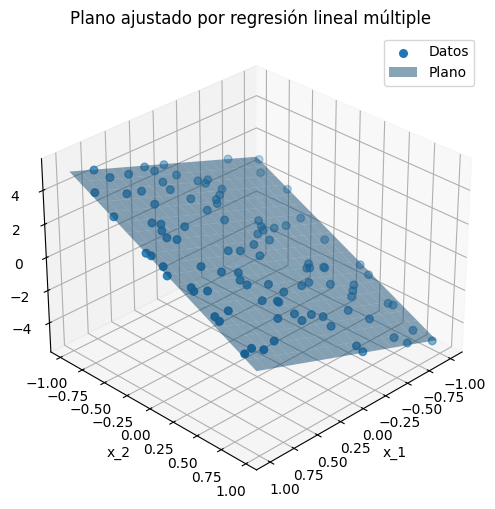

In [736]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x1'], df['x2'], df['y'], s=30, label='Datos')

# Crear el plano 
# se define el rango de x_1 y x_2
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 20)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 20)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Ecuación del plano
Y = MR.theta[1] * X1 + MR.theta[2] * X2

# Superficie del plano
ax.plot_surface(X1, X2, Y, alpha=0.5, label='Plano')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y_label')
ax.set_title('Plano ajustado por regresión lineal múltiple')
ax.view_init(azim=45)
ax.set_box_aspect(aspect=None, zoom=1)

plt.legend()
plt.show()